# Introduction

**PageRank** is an algorithm used by Google Search to rank sites in their web crawler results. Consider world wide web as a large graph where web pages are nodes and links are the edges of this graph. A webpage is more relevant if it has more upcomming links and the incomming links are well reputed.

In [0]:
import random
import operator
import numpy as np
import networkx as nx
import scipy.stats as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Dataset Description & Interpretation of the PageRank value

**Dataset Description**

[Wikipedia](https://www.wikipedia.org/) is a free encyclopedia written collaboratively by volunteers around the world. In order for a user to become an Wikipedia administrator a Request for adminship (RfA) is issued and the Wikipedia community via a public discussion or a vote decides who to promote to adminship. The network contains all the Wikipedia *Voting Data* from the inception of Wikipedia till January 2008. Nodes in the network represent wikipedia users and a directed edge from node i to node j represents that user i voted on user j.

**Interpretation of the PageRank value**

In this case, the page rank would interpret the popularity of the user, More directed edges would result in better page rank i-e greater votes that would result in a high chance of winning the election.

In [31]:
g = nx.read_edgelist("Wiki-Vote.txt", create_using=nx.DiGraph(), nodetype = int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 7115
Number of edges: 103689
Average in degree:  14.5733
Average out degree:  14.5733


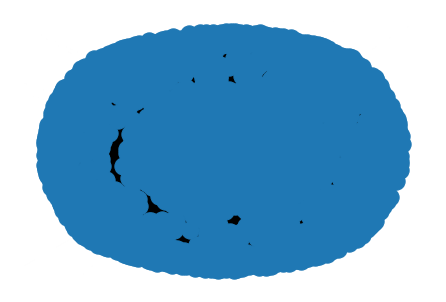

In [32]:
nx.draw(g, with_labels=False)
plt.show()

# Exit criteria & Convergence analysis

**Exit Criteria**

The process is repeated until the resulting vector, with rank for every single page, converges. We have two exit criterias:


*   When the number of iterations finish.
*   When the correlation between the previous state of ranks and the new state is less than a certain epsilon value.

**Convergence Analysis**

After experimenting with the different number of iterations and epsilon values, we observed that:


*   Precision is directly proportional to the number of iterations.
*   Precision is inversly proportional to the value of epsilon.

There is a trade-off between the time complexity and accuracy here. Although we get precise results (higher correlation between our algorithm and bultin algorithm us Networkx library), with greater number of iterations and lower epsilon value, but we sacrifice the convergence time.


In [58]:
def random_walk(g, eps):

  nodes_list = list(g.nodes)
  points = {}

  for x in nodes_list:
    points[x] = 0

  r = random.choice(nodes_list)
  points[r] += 1

  for i in range(100000):

    last_state = list(points.values())
    out = list(g.neighbors(r))

    if len(out) == 0:
      r = random.choice(nodes_list)
    else:
      r = random.choice(out)

    points[r] += 1
    new_state = list(points.values())

    if (1 - np.corrcoef(new_state, last_state)[0][1]) < eps:
      break

    if i % 20000 == 0 and i != 0:
      print('<> ' + str(i) + ' iterations completed')

  return points


# Comparison

rw_points = random_walk(g, 1e-9)
rw_sorted = sorted(rw_points.items(), key=lambda kv: kv[1], reverse=True)
print('\n\nImplemented Random walk: ', rw_sorted)

pr_points = nx.pagerank(g)
pr_sorted = sorted(pr_points.items(), key=lambda kv: kv[1], reverse=True)
print('Builtin Random walk: ', pr_sorted)

<> 20000 iterations completed
<> 40000 iterations completed
<> 60000 iterations completed
<> 80000 iterations completed


Implemented Random walk:  [(6634, 472), (4037, 462), (2625, 392), (15, 385), (2398, 282), (7553, 275), (2328, 254), (6946, 251), (5412, 248), (737, 242), (2237, 239), (4335, 238), (2470, 237), (1297, 234), (762, 233), (2066, 233), (4191, 232), (7632, 226), (7620, 226), (3352, 224), (5254, 216), (8042, 210), (1186, 208), (4875, 200), (5484, 195), (2565, 194), (3089, 192), (3334, 190), (6832, 190), (4735, 189), (5233, 184), (7092, 181), (2654, 176), (5423, 174), (6774, 173), (3456, 172), (665, 169), (8163, 168), (1211, 166), (4712, 165), (2535, 162), (993, 160), (4310, 159), (5404, 157), (1549, 156), (6914, 156), (214, 154), (2657, 152), (2958, 152), (3084, 152), (4828, 152), (28, 150), (271, 150), (2746, 150), (3117, 148), (5210, 144), (3562, 142), (8293, 142), (2651, 140), (4400, 140), (4261, 138), (3898, 137), (3459, 137), (5079, 136), (5123, 132), (2859, 129), (46

In [0]:
rw_list = [x for x in list(rw_points.values())]
pr_list = [x for x in list(pr_points.values())]

rw_list = [float(i)/sum(rw_list) for i in rw_list]
pr_list = [float(i)/sum(pr_list) for i in pr_list]

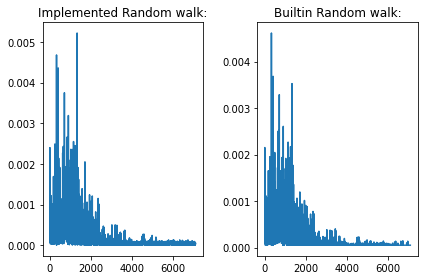

In [44]:
plt.subplot(1, 2, 1)
plt.title('Implemented Random walk:')
plt.plot(rw_list)
plt.subplot(1, 2, 2)
plt.title('Builtin Random walk:')
plt.plot(pr_list)
plt.tight_layout()
plt.show()

In [45]:
print("\nCorrelation between the result of our Algorithm and Networkx library: \n")
print(np.corrcoef(rw_list, pr_list))


Correlation between the result of our Algorithm and Networkx library: 

[[1.         0.98398881]
 [0.98398881 1.        ]]


# PageRank values Distribution analysis

We run couple of normality checks, using both graphical methods and statistical test to check if your our resulting distribution is Gaussian:



1.   **Histogram plot** showing the number of observations in each bin. We can see it doesnot the familiar bell-shape, thus it's not normal.

2.   **Quantile-Quantile Plot** showing strong deviation of dots and the line, concluding a deviation from expected distribution

3.   **Shapiro-Wilk Test** evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution


All of these tests suggests that our page rank values distribution is not normal. Also, we get some statistical insights on our page rank result.

In [46]:
print('\n STATISTICAL INSIGHTS\n')
print(st.describe(rw_list))


 STATISTICAL INSIGHTS

DescribeResult(nobs=7115, minmax=(0.0, 0.005219947800521995), mean=0.000140548137737175, variance=7.649657960335253e-08, skewness=5.73889310824194, kurtosis=56.04559784021104)


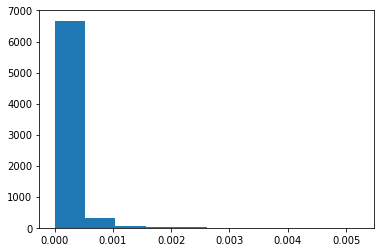

In [47]:
plt.hist(rw_list)
plt.show()

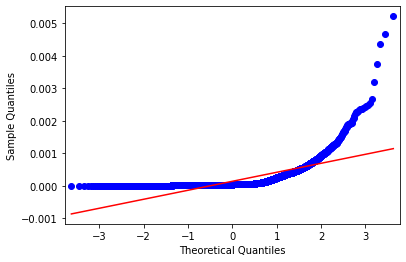

In [48]:
qqplot(np.array(rw_list), line='s')
pyplot.show()

In [49]:
alpha = 0.05
stat, p = shapiro(rw_list)
print('\n<> Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('\n<> Sample looks Gaussian (fail to reject H0)')
else:
	print('\n<> Sample does not look Gaussian (reject H0)\n\n')


<> Statistics=0.464, p=0.000

<> Sample does not look Gaussian (reject H0)




/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Interpretation of nodes with the highest values


As, nodes in the network represent wikipedia users and a directed edge from node i to node j represents that user i voted on user j. So, the higer values of nodes would interpret the popularity of the user, More directed edges would result in better page rank i-e greater votes that would result in a high chance of winning the election.



In [70]:
print('\nFollowing are the top 5 most voted nodes in our graph:\n')

for i in range(6):
  print(str(i+1) + '- ' + str(pr_sorted[i][0]))


Following are the top 5 most voted nodes in our graph:

1- 4037
2- 15
3- 6634
4- 2625
5- 2398
6- 2470


# References

    Following are the links of references:



*   [Normality Tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

*   [Dataset desciption](https://snap.stanford.edu/data/wiki-Vote.html)
*   [Random Walk](https://towardsdatascience.com/brief-introduction-to-markov-chains-2c8cab9c98ab)
*   [PageRank](https://en.wikipedia.org/wiki/PageRank#Iterative)



